In [1]:
from pyvisgen.simulation.utils import read_config

## Configuration

The simulation configuration is done in a toml file. Here the following settings can be specified:

In [2]:
conf = read_config("../config/default.toml")

In [3]:
conf

{'src_coord': <SkyCoord (ICRS): (ra, dec) in deg
     (187.70593076, 12.39112324)>,
 'fov_size': 0.00018382,
 'corr_int_time': 10.0,
 'scan_start': '2016:95:00:00:00',
 'scan_duration': 300,
 'scans': 72,
 'channel': '227297:4096',
 'interval_length': 1200}

In [4]:
from pyvisgen.layouts.layouts import get_array_layout

## Array Layouts

Get array layout and save it as dataclass. At the moment, following interferometer arrays are available:
* EHT (Event Horizon Telescope)

In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
from dataclasses import dataclass, asdict, astuple


In [6]:
eht = get_array_layout("eht")

In [7]:
from pyvisgen.simulation.scan import get_baselines
from pyvisgen.simulation.utils import calc_time_steps
import matplotlib.pyplot as plt

## Simulating Visibilities

Calculate baselines for specified observation settings.

In [8]:
%%time
time_start, time_stop = calc_time_steps(conf)

CPU times: user 3.13 s, sys: 14.4 ms, total: 3.15 s
Wall time: 3.14 s


In [11]:
time_start[0]

<Time object: scale='utc' format='yday' value=2016:095:00:00:00.000>

In [9]:
%%time
start_uvs = get_baselines(conf["src_coord"], time_start, eht)

CPU times: user 7.76 s, sys: 40.7 ms, total: 7.8 s
Wall time: 7.75 s


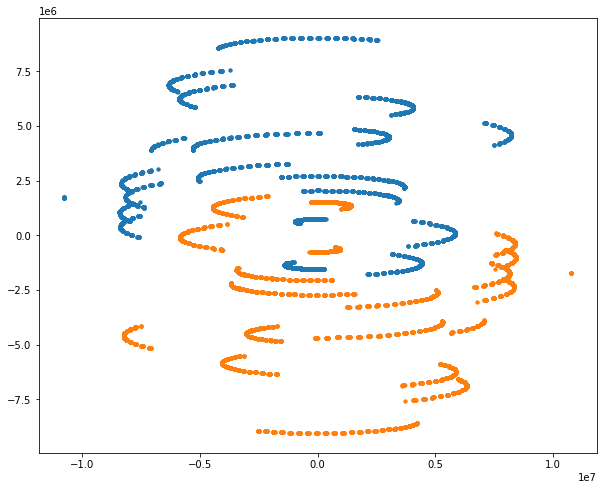

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(start_uvs.u[start_uvs.valid == True], start_uvs.v[start_uvs.valid == True], linestyle="none", marker='.')
plt.plot(-start_uvs.u[start_uvs.valid == True], -start_uvs.v[start_uvs.valid == True], linestyle="none", marker='.')

In [11]:
from pyvisgen.simulation.scan import create_bgrid

Calculate Beam grids with corresponding field of views centered around the pointing position.

In [12]:
bgrid = create_bgrid(conf["fov_size"], 32, conf["src_coord"])
bgrid.shape

(32, 32, 2)